In [2]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [3]:
class Neuron:
    def __init__(self, weights, bias):
        # <создать атрибуты объекта weights и bias>
        self.weights = weights
        self.bias = bias

    def forward(self, inputs):
        return torch.dot(inputs, weights) + bias


In [4]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [5]:
neuron = Neuron(weights, bias)
neuron.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [6]:
class Linear:
    def __init__(self, weights, biases):
        # <создать атрибуты объекта weights и biases>
        self.weights = weights
        self.biases = biases

    def forward(self, inputs):
        return torch.matmul(self.weights, inputs) + self.biases

In [7]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])

In [8]:
linear = Linear(weights, biases)
linear.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [9]:
class Linear:
    def __init__(self, _weights, _biases):
        # <создать атрибуты объекта weights и biases>
        self.weights = _weights
        self.biases = _biases

    def forward(self, inputs):

        return self.weights @ inputs.T + self.biases


linear = Linear(weights, biases)
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])
linear.forward(inputs)

tensor([[ 3.7900,  5.7100,  6.1000],
        [ 1.3500, -2.1000,  5.2510],
        [ 5.0250,  2.4100,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [11]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)


    def forward(self, inputs):
        return inputs @ self.weights + self.biases

In [12]:
linear = Linear(4, 10)
linear.forward(inputs)

tensor([[ -6.0294,  -1.4502,  -3.5475,  -0.8425,  16.3040, -12.4377,  -0.8205,
          -1.5275,   4.6177,  -1.9093],
        [  2.9308,   0.1708,   0.0790,  -3.0232,  10.2074,  -4.7322,   1.3257,
           2.7998,   0.4641,  -4.4207],
        [ -4.6547,  -0.6105,  -0.5196,  -7.3814,  15.0345,  -7.6584,   4.1825,
           0.7624,   0.3556,  -5.6024]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [13]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

f1 = Linear(4, 50)
f2 = Linear(50, 7)
f2.forward(f1.forward(inputs))

tensor([[ 11.4644,  18.9641,  45.4958, -25.0578, -14.0290,  46.5379,  -7.0298],
        [-20.7976,   2.7615,  16.4482,  77.0656, -35.8518,  67.1925, -22.6630],
        [ -6.0851,  33.5455,  54.7105,  -0.5206, -27.5591,  -2.0723,  -2.8047]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb"/>

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [14]:
class ReLU:
    def forward(self, inputs):
        # <реализовать логику ReLU>
        return (inputs >= 0) * inputs

In [15]:
a = torch.randn(4, 3)
print(a)
relu = ReLU()
relu.forward(a)

tensor([[-1.5308, -1.4859,  0.8739],
        [ 0.8797, -1.2258,  1.5866],
        [-0.8724, -0.9495, -1.9599],
        [-2.7809,  0.3893, -0.9069]])


tensor([[-0.0000, -0.0000, 0.8739],
        [0.8797, -0.0000, 1.5866],
        [-0.0000, -0.0000, -0.0000],
        [-0.0000, 0.3893, -0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [16]:
class Softmax:
    def forward(self, inputs):
        # <реализовать логику Softmax>
        exps = torch.exp(inputs)
        return exps / exps.sum(axis=1).reshape(-1, 1)

a = torch.randn(4, 3)
print(a)
sm = Softmax()
sm.forward(a)

tensor([[ 0.4812,  0.1776,  1.2847],
        [-0.3332,  1.6120,  1.4546],
        [-0.7393, -0.3943,  0.3070],
        [-1.9191,  0.3833, -0.9068]])


tensor([[0.2518, 0.1859, 0.5623],
        [0.0716, 0.5007, 0.4277],
        [0.1901, 0.2685, 0.5414],
        [0.0727, 0.7271, 0.2001]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [17]:
class ELU:
    def __init__(self, alpha):
        # <создать атрибут объекта alpha>
        self.alpha = alpha

    def forward(self, inputs):
        # <реализовать логику eLU>
        return (self.alpha * (torch.exp(inputs) - 1)) * (inputs < 0) + (inputs >= 0) * inputs

In [18]:
a = torch.randn(4, 3)
print(a)
elu = ELU(0.1)
elu.forward(a)

tensor([[-1.0769,  1.6317, -0.4223],
        [-0.2484,  2.5526,  0.2335],
        [-1.2082, -0.9650, -0.3394],
        [ 0.2117,  0.4899, -0.5298]])


tensor([[-0.0659,  1.6317, -0.0344],
        [-0.0220,  2.5526,  0.2335],
        [-0.0701, -0.0619, -0.0288],
        [ 0.2117,  0.4899, -0.0411]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [19]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

In [20]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

fc = Linear(4, 1)
yp = fc.forward(inputs)
loss = MSELoss()
loss.forward(y, yp)

tensor(19.6087)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [21]:
class CategoricalCrossentropyLoss:
    def forward(self, y_pred, y_true):
        # <реализовать логику CCE>
        y_pred: torch.Tensor  # тензор размера [размер батча х количество классов]
        print(y_pred)
        y_pred = y_pred[range(y_pred.shape[1]), y_true]
        print(y_pred)
        return - torch.log(y_pred).sum()

In [27]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([1, 0, 0])
sm = Softmax()
fc = Linear(4, 3)
fc.weights = inputs.T
fc.biases *= 0
yp = sm.forward(fc.forward(inputs))

loss = CategoricalCrossentropyLoss()
loss.forward(yp, y)

tensor([[9.9786e-01, 1.9263e-03, 2.1344e-04],
        [2.0612e-09, 1.0000e+00, 4.6349e-13],
        [9.4200e-05, 1.9117e-07, 9.9991e-01]])
tensor([1.9263e-03, 2.0612e-09, 9.4200e-05])


tensor(35.5222)

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [22]:
class MSELossL2:
    def __init__(self, lambda_):
        # <создать атрибут объекта alpha>
        self.lambda_ = lambda_

    def data_loss(self, y_pred, y_true):
        # <подсчет первого слагаемого из формулы>
        return torch.mean((y_pred - y_true) ** 2)

    def reg_loss(self, layer):
        # используйте атрибуты объекта layer, в которых хранятся веса слоя
        # <подсчет второго слагаемого из формулы>
        return self.lambda_ * ((layer.weights ** 2).sum() + (layer.biases ** 2).sum())

    def forward(self, y_pred, y_true, layer):
        return self.data_loss(y_pred, y_true) + self.reg_loss(layer)

In [23]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

fc = Linear(4, 1)
yp = fc.forward(inputs)
loss = MSELossL2(1)
loss.forward(y, yp, fc)

tensor(23.1174)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [24]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X).float()  # <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.tensor(y).float()  # <преобразуйте массивы numpy в тензоры torch с типом torch.float32

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [1]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true) # df/dc


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [25]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, 1)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        return inputs @ self.weights + self.bias  # <реализовать логику нейрона>

    def backward(self, dvalue):
        # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
        self.dweights = dvalue # df/dW
        self.dinput = dvalue * self.weights # df/wX
        self.dbias = dvalue # df/db


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [42]:
n_inputs = 4 # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred = neuron.forward(x_example) # <прогон через нейрон>
        curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
        losses.append(curr_loss)

        # backprop
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)
        # <шаг оптимизации для весов (weights и bias) нейрона>

        neuron.weights -= learning_rate * neuron.dweights * x_example.reshape(-1, 1)
        neuron.bias -= learning_rate * neuron.dbias


In [43]:
import plotly.express as px
px.line(y=losses[:200])

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [82]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return ((y_pred - y_true) ** 2).mean()  # <реализовать логику MSE>

    def backward(self, y_pred, y_true):
        self.dinput = 2 / y_pred.shape[0] * (y_pred - y_true).reshape(-1, 1)  # df/dy^


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [83]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, 1)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        return inputs @ self.weights + self.bias # <реализовать логику нейрона>

    def backward(self, dvalue: torch.Tensor):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dweights = dvalue # df/dW
        self.dbias = dvalue.sum(0) # df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [84]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred.flatten(), y.flatten()) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred.flatten(), y.flatten())
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * (X.T @ neuron.dweights).reshape(-1, 1)
    neuron.bias -= learning_rate * neuron.dbias

curr_loss

tensor(6.0479e-10)

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [109]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return inputs @ self.weights + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = self.inputs.T @ dvalues # df/dW
        self.dbiases = dvalues.sum(axis=0) # df/db
        self.dinputs = dvalues @ self.weights.T # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [110]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

neuron = Linear(n_inputs, 1)
loss = MSELoss()

for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred.flatten(), y.flatten()) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred.flatten(), y.flatten())
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.biases -= learning_rate * neuron.dbiases

curr_loss

tensor(0.0958)

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [111]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [112]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output

    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [113]:
# создание компонентов сети
# fc1 =
# relu1 =
# fc2 =
fc1 = Linear(1, 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    out = fc2.forward(relu1.forward(fc1.forward(X)))
    data_loss = loss.forward(out, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(out)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    loss.backward(out, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases
    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases


epoch 0 mean loss 32.36814498901367
epoch 200 mean loss 0.019857842475175858
epoch 400 mean loss 0.013703077100217342
epoch 600 mean loss 0.010976385325193405
epoch 800 mean loss 0.009608831256628036
epoch 1000 mean loss 0.008700136095285416
epoch 1200 mean loss 0.008110519498586655
epoch 1400 mean loss 0.007511652074754238
epoch 1600 mean loss 0.006730236578732729
epoch 1800 mean loss 0.00609883526340127
epoch 2000 mean loss 0.005645080003887415


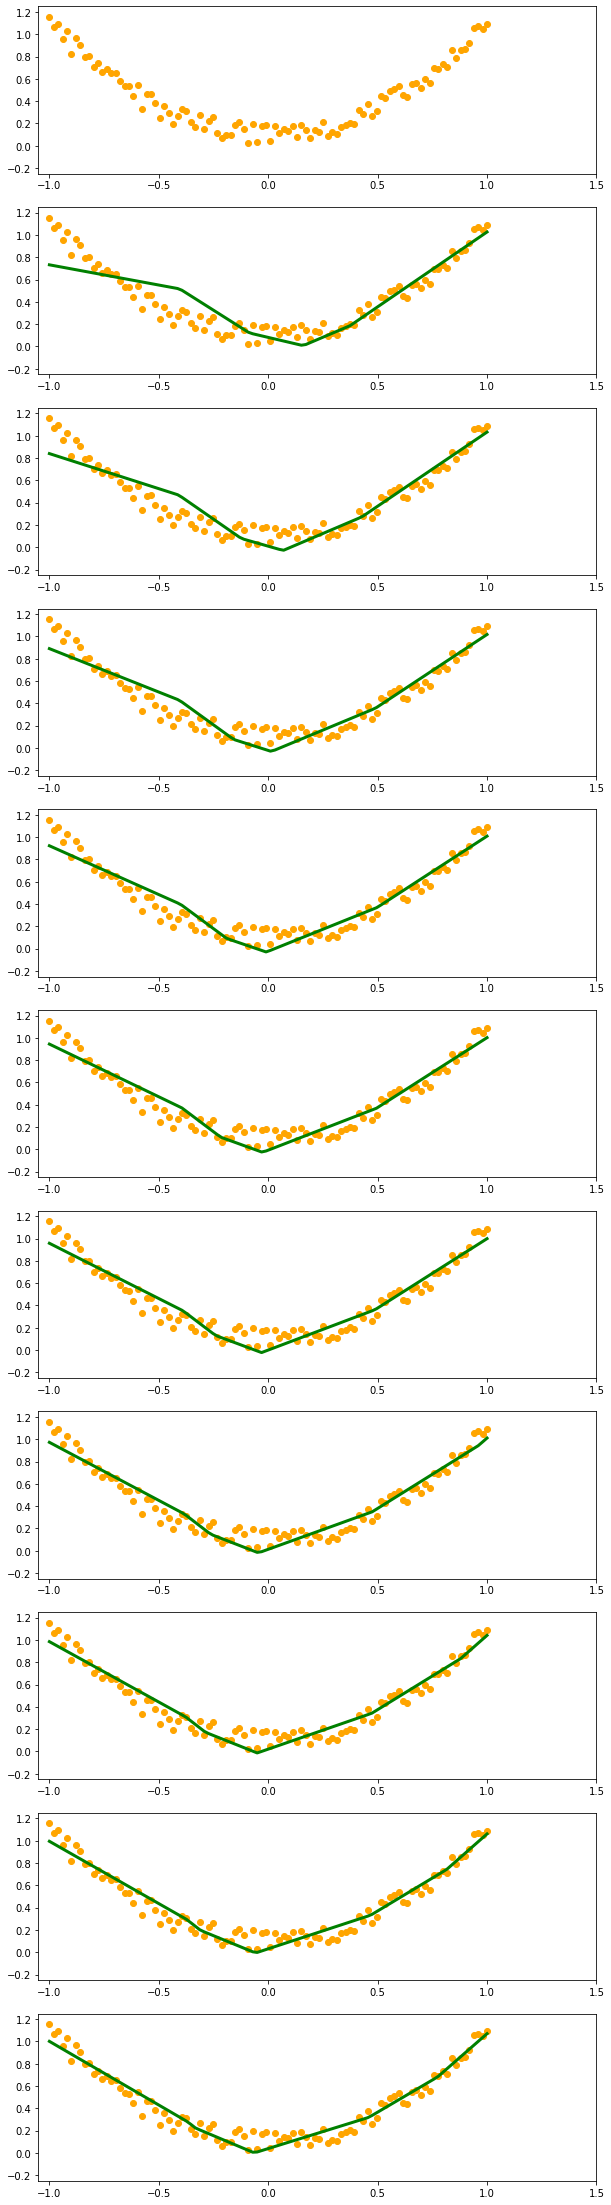

In [118]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color="orange")
    ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)